In [1]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r "/content/drive/MyDrive/Metrics Baseline/Data/results_resnet/" ./

Mounted at /content/drive


In [2]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib
import colorsys
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

from google.colab import drive
drive.mount('/content/drive')

def set_size(w,h):
  plt.rcParams["figure.figsize"] = [w,h]

def fontsize(mult):
  matplotlib.rcParams.update({'font.size': 12 * mult})

all_cmaps = []

def get_alpha_cmap(rgb_color):
    # Normalize the RGB color values to the range [0, 1]
    rgb_color = np.array(rgb_color) / 255.0

    # Create an alpha colormap with varying alpha values
    cmap_data = {'red':   [(0, rgb_color[0], rgb_color[0]),
                           (1, rgb_color[0], rgb_color[0])],
                 'green': [(0, rgb_color[1], rgb_color[1]),
                           (1, rgb_color[1], rgb_color[1])],
                 'blue':  [(0, rgb_color[2], rgb_color[2]),
                           (1, rgb_color[2], rgb_color[2])],
                 'alpha': [(0, 0, 0),
                           (1, 1, 1)]}

    alpha_cmap = mcolors.LinearSegmentedColormap('alpha_cmap', cmap_data, N=256)

    all_cmaps.append(alpha_cmap)

    return alpha_cmap

slack_blue  = get_alpha_cmap((54, 197, 240))
slack_green = get_alpha_cmap((46, 182, 125) )
slack_red   = get_alpha_cmap((210, 40, 95))
slack_yellow = get_alpha_cmap((236, 178, 46))
slack_violet = get_alpha_cmap((84, 25, 85))

google_blue = get_alpha_cmap((66, 133, 244))
google_red = get_alpha_cmap((219, 68, 55))
google_yellow= get_alpha_cmap((244, 180, 0))
google_green = get_alpha_cmap((15, 157, 88))

deep_purple = get_alpha_cmap((103, 58, 183))
pink = get_alpha_cmap((236, 64, 122))
anthracite = get_alpha_cmap((13, 13, 21))

palette_1 = get_alpha_cmap((33, 115, 174))
palette_2 = get_alpha_cmap((216, 146, 49))
palette_3 = get_alpha_cmap((58, 155, 118))
palette_4 = get_alpha_cmap((210, 158, 201))

import scipy
import matplotlib as mpl
mpl.rcdefaults()
fontsize(1.3)
set_size(7, 5)
plt.style.use("seaborn-ticks")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-2-5043ed6fe63b>:67: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-ticks")


In [20]:
baseline_to_color = {
'zero' : slack_violet,
'uniform' : palette_1,
'normal' : palette_1,
'permutation' : palette_2,
'local_permutation' : palette_2,
'local_mean' : palette_3,
'mean' : palette_3,
'median' : palette_3,
'random_color' : slack_violet,
'scramble_phase' : palette_4,
'scramble_amplitude' : palette_4,
}

baseline_to_linestyle = {
'zero' : '-',
'uniform' : '-',
'normal' : '--',
'permutation' : '-',
'local_permutation' : '--',
'local_mean' : '-',
'mean' : '--',
'median' : ':',
'random_color' : '--',
'scramble_phase' : '-',
'scramble_amplitude' : '--',
}

baseline_to_symbol = {
'zero' : 'o',
'uniform' : 'o',
'normal' : 'v',
'permutation' : 'o',
'local_permutation' : 'v',
'local_mean' : 'o',
'mean' : 'v',
'median' : 's',
'random_color' : 'v',
'scramble_phase' : 'o',
'scramble_amplitude' : 'v',
}

In [4]:
data = np.load('/content/results_resnet/ood_scores_resnet.npy', allow_pickle=True)[()]
data.keys()

dict_keys(['zero', 'uniform', 'normal', 'permutation', 'local_mean', 'local_permutation', 'mean', 'median', 'random_color', 'scramble_phase', 'scramble_amplitude'])

In [5]:
for baseline in data.keys():
  print(baseline)

zero
uniform
normal
permutation
local_mean
local_permutation
mean
median
random_color
scramble_phase
scramble_amplitude


In [67]:
blue_1 = np.array((96, 148, 200)) / 255.0
blue_2 = np.array((211, 237, 246)) / 255.0
orange_1 = np.array((209, 111, 77)) / 255.0
orange_2 = np.array((248, 232, 192)) / 255.0

# Deletion

In [90]:
data = np.load('/content/results_resnet/ood_scores_resnet.npy', allow_pickle=True)[()]
data.keys()
results = {}

for baseline in data.keys():
  ood_curve = [s for _,s in data[baseline]]
  results[baseline] = ood_curve

In [91]:
curves = []

<ipython-input-93-7b5c94d23f6d>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-ticks")
<ipython-input-93-7b5c94d23f6d>:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.arange(len(curve)), curve, c=color(1.0), marker=baseline_to_symbol[baseline],


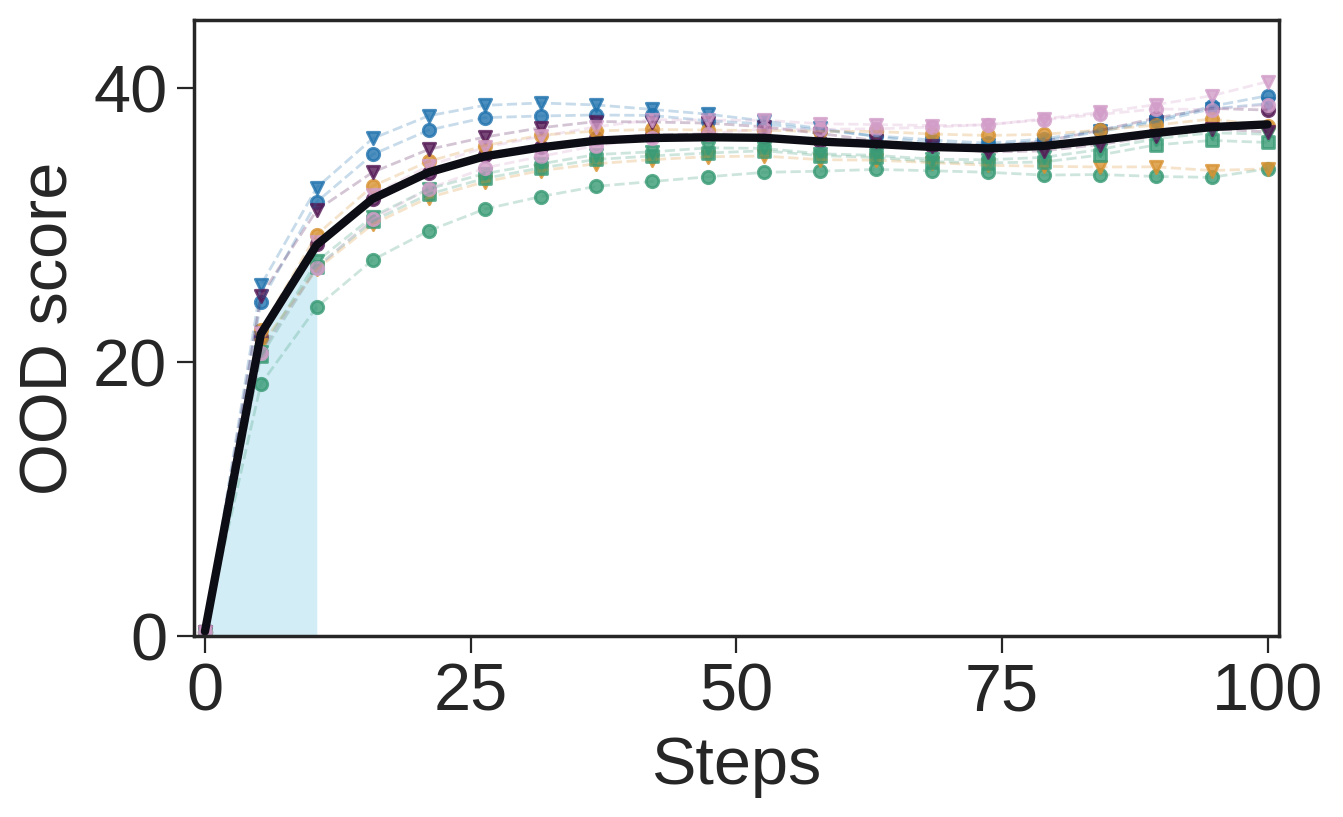

In [93]:
import scipy
import matplotlib as mpl
from scipy import interpolate

mpl.rcdefaults()
fontsize(2.0)
set_size(7, 4)
plt.style.use("seaborn-ticks")

lw1 = 1.0
lw2 = 3.0
alpha_minor = 0.25

plt.fill_between(np.arange(len(curve))[:int(0.18*len(curve))], mean_curve[:int(0.18*len(curve))]*0.0,
                 mean_curve[:int(0.18*len(curve))], color=blue_2, alpha=1.0, linewidth=0.0)

for baseline in results:
  points = results[baseline]

  curve = [np.mean(p) for p in points][:]
  stds = [np.std(p) for p in points][:]

  color = baseline_to_color[baseline]
  k = color(1.0)[0]

  curves.append(curve)

  ls = baseline_to_linestyle[baseline]

  #plt.plot(curve, label=baseline.replace('_', ' '), linewidth=lw, c=color(1.0), alpha=0.8, linestyle=ls)
  plt.scatter(np.arange(len(curve)), curve, c=color(1.0), marker=baseline_to_symbol[baseline],
              label=baseline.replace('_', ' '), alpha=0.8, s=20.0)
  plt.plot(np.arange(len(curve)), curve, linewidth=lw1, c=color(1.0), alpha=alpha_minor, linestyle="--")


mean_curve = np.mean(curves, 0)
plt.plot(np.arange(len(curve)), mean_curve, linewidth=lw2, c=anthracite(1.0), alpha=1.0, linestyle="-", label='Average')
#plt.fill_between(np.arange(len(curve))[:int(0.3*len(curve))], mean_curve[:int(0.3*len(curve))]*0.0,
#                 mean_curve[:int(0.3*len(curve))], color=blue_1, alpha=0.4)


#legend = plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15),
#                      fancybox=True, shadow=True, borderpad=0.5, ncol=4, frameon=True,
#                      facecolor='white')

plt.xticks(np.linspace(0, len(curve)-1, 11//2), np.linspace(0, 100, 11//2).astype(np.int32))
plt.xlabel("Steps")
plt.ylabel('OOD score')
plt.ylim([0, 45])
plt.xlim([-0.2, len(curve)-0.8])
plt.savefig('ood_resnet_deletion.png', dpi=400, transparent=True)
#plt.title()

In [94]:
data = np.load('/content/results_resnet/ood_scores_resnet_insertion.npy', allow_pickle=True)[()]
results = {}

for baseline in data.keys():
  ood_curve = [s for _,s in data[baseline]]
  results[baseline] = ood_curve

In [95]:
curves = []

<ipython-input-97-7726b0e1db2e>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-ticks")
<ipython-input-97-7726b0e1db2e>:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.arange(len(curve)), curve, c=color(1.0), marker=baseline_to_symbol[baseline],


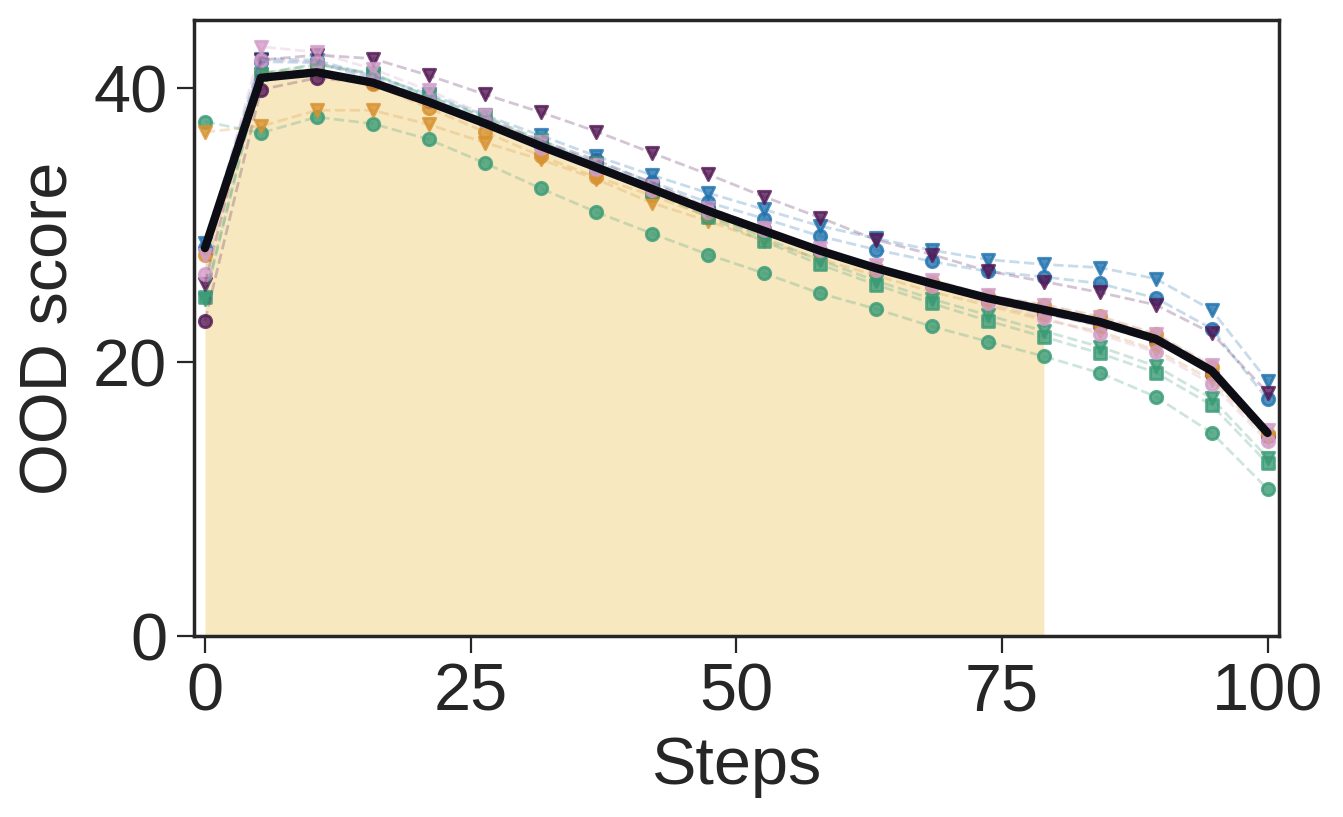

In [97]:
import scipy
import matplotlib as mpl
from scipy import interpolate

mpl.rcdefaults()
fontsize(2.0)
set_size(7, 4)
plt.style.use("seaborn-ticks")

lw1 = 1.0
lw2 = 3.0
alpha_minor = 0.25

plt.fill_between(np.arange(len(curve))[:int(0.81*len(curve))], mean_curve[:int(0.81*len(curve))]*0.0,
                 mean_curve[:int(0.81*len(curve))], color=orange_2, alpha=1.0, linewidth=0.0)

for baseline in results:
  points = results[baseline]

  curve = [np.mean(p) for p in points][:]
  stds = [np.std(p) for p in points][:]

  color = baseline_to_color[baseline]
  k = color(1.0)[0]

  curves.append(curve)

  ls = baseline_to_linestyle[baseline]

  #plt.plot(curve, label=baseline.replace('_', ' '), linewidth=lw, c=color(1.0), alpha=0.8, linestyle=ls)
  plt.scatter(np.arange(len(curve)), curve, c=color(1.0), marker=baseline_to_symbol[baseline],
              label=baseline.replace('_', ' '), alpha=0.8, s=20.0)
  plt.plot(np.arange(len(curve)), curve, linewidth=lw1, c=color(1.0), alpha=alpha_minor, linestyle="--")


mean_curve = np.mean(curves, 0)
plt.plot(np.arange(len(curve)), mean_curve, linewidth=lw2, c=anthracite(1.0), alpha=1.0, linestyle="-", label='Average')
#plt.fill_between(np.arange(len(curve))[:int(0.3*len(curve))], mean_curve[:int(0.3*len(curve))]*0.0,
#                 mean_curve[:int(0.3*len(curve))], color=blue_1, alpha=0.4)


#legend = plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15),
#                      fancybox=True, shadow=True, borderpad=0.5, ncol=4, frameon=True,
#                      facecolor='white')

plt.xticks(np.linspace(0, len(curve)-1, 11//2), np.linspace(0, 100, 11//2).astype(np.int32))
plt.xlabel("Steps")
plt.ylabel('OOD score')
plt.ylim([0, 45])
plt.xlim([-0.2, len(curve)-0.8])
plt.savefig('ood_resnet_insertion.png', dpi=400, transparent=True)
#plt.title()

<ipython-input-65-60e86b087df6>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-ticks")
<ipython-input-65-60e86b087df6>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.arange(len(curve)), curve, c=color(1.0), marker=baseline_to_symbol[baseline],


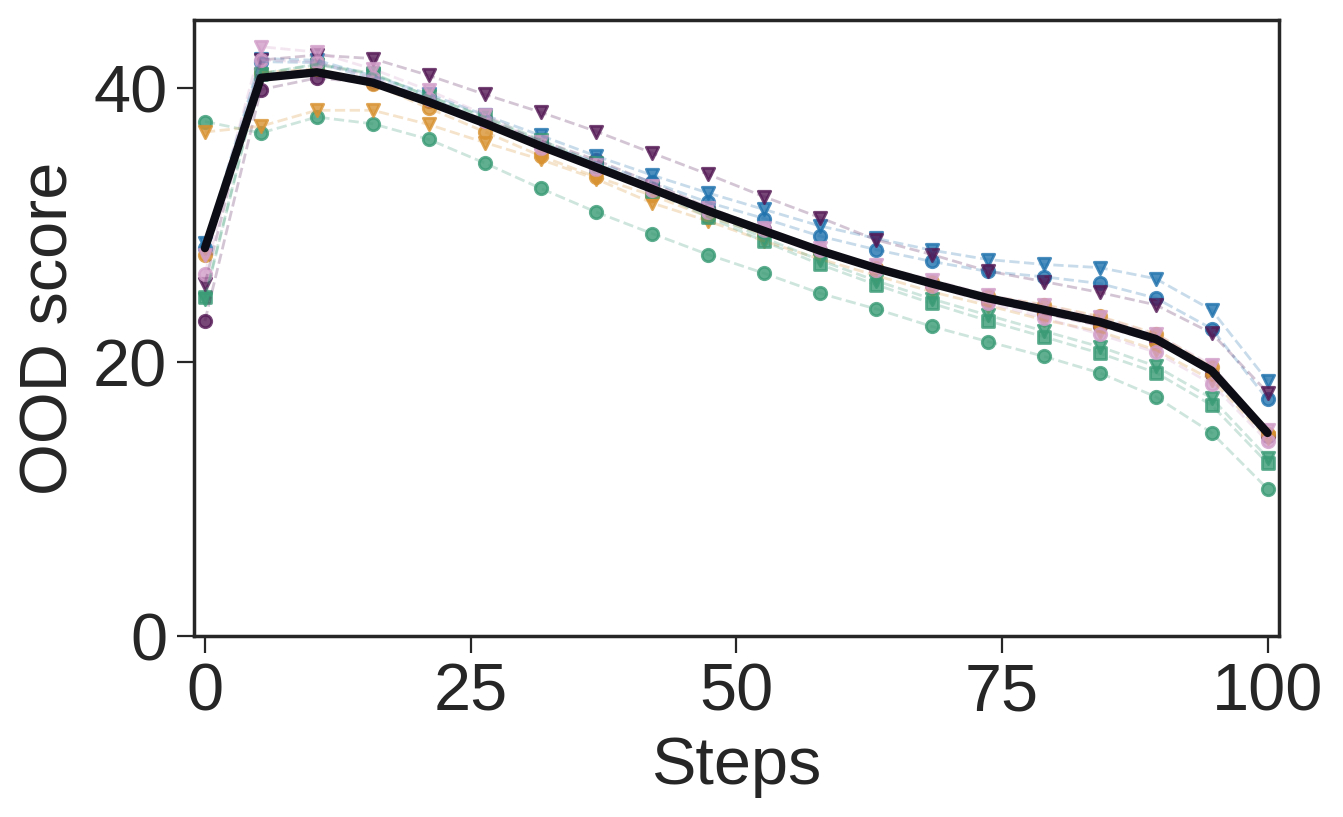

In [65]:
import scipy
import matplotlib as mpl
from scipy import interpolate

mpl.rcdefaults()
fontsize(2.0)
set_size(7, 4)
plt.style.use("seaborn-ticks")

lw1 = 1.0
lw2 = 3.0
alpha_minor = 0.25

curves = []

for baseline in results:
  points = results[baseline]

  curve = [np.mean(p) for p in points][:]
  stds = [np.std(p) for p in points][:]

  color = baseline_to_color[baseline]
  k = color(1.0)[0]

  curves.append(curve)

  ls = baseline_to_linestyle[baseline]

  #plt.plot(curve, label=baseline.replace('_', ' '), linewidth=lw, c=color(1.0), alpha=0.8, linestyle=ls)
  plt.scatter(np.arange(len(curve)), curve, c=color(1.0), marker=baseline_to_symbol[baseline],
              label=baseline.replace('_', ' '), alpha=0.8, s=20.0)
  plt.plot(np.arange(len(curve)), curve, linewidth=lw1, c=color(1.0), alpha=alpha_minor, linestyle="--")


mean_curve = np.mean(curves, 0)
plt.plot(np.arange(len(curve)), mean_curve, linewidth=lw2, c=anthracite(1.0), alpha=1.0, linestyle="-", label='Average')


#legend = plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15),
#                      fancybox=True, shadow=True, borderpad=0.5, ncol=4, frameon=True,
#                      facecolor='white')

plt.xticks(np.linspace(0, len(curve)-1, 11//2), np.linspace(0, 100, 11//2).astype(np.int32))
plt.xlabel("Steps")
plt.ylabel('OOD score')
plt.ylim([0, 45])
plt.xlim([-0.2, len(curve)-0.8])
plt.savefig('ood_resnet_insertion.png', dpi=400, transparent=True)
#plt.title()

<ipython-input-89-ede63e4de0ef>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-ticks")
<ipython-input-89-ede63e4de0ef>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.arange(len(curve)), curve, c=color(1.0), marker=baseline_to_symbol[baseline],


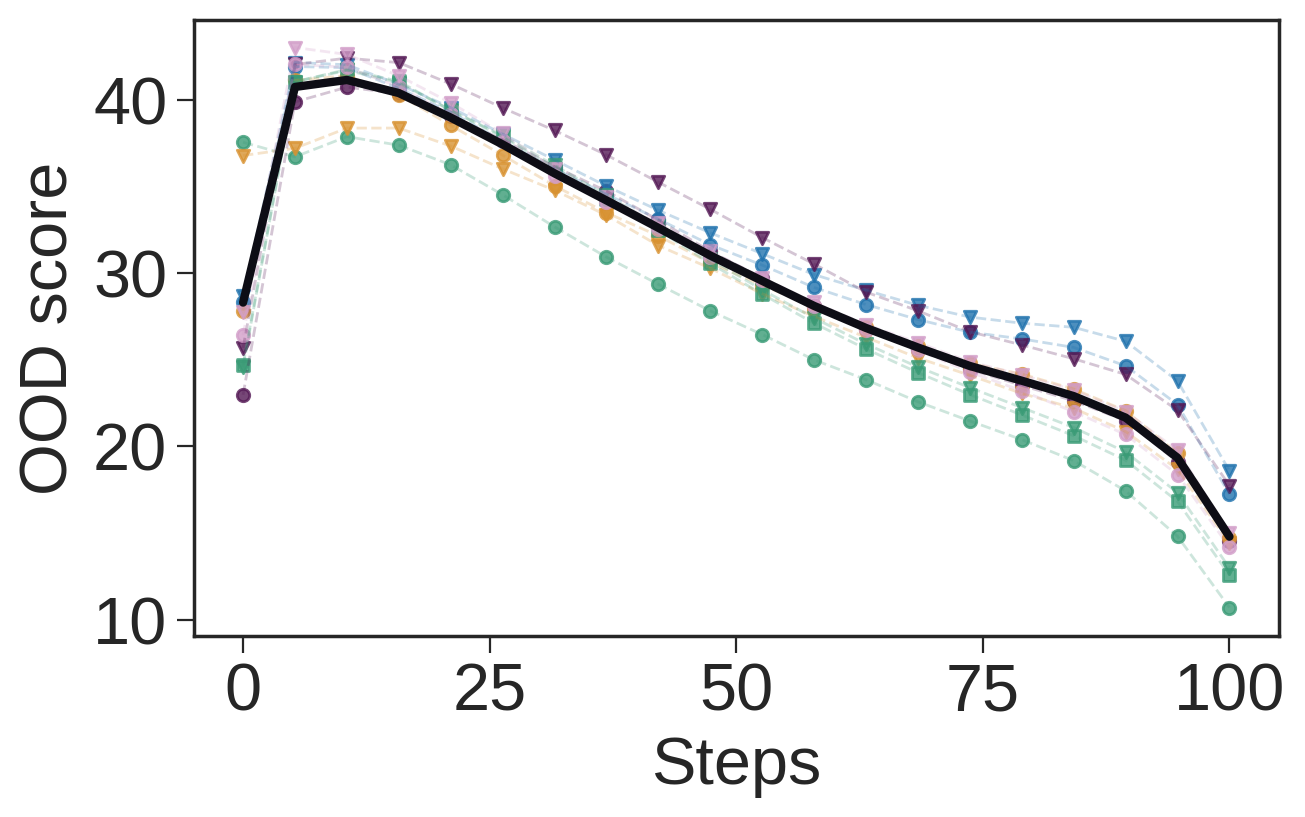

In [89]:
import scipy
import matplotlib as mpl
from scipy import interpolate

mpl.rcdefaults()
fontsize(2.0)
set_size(7, 4)
plt.style.use("seaborn-ticks")

lw1 = 1.0
lw2 = 3.0
alpha_minor = 0.25

curves = []

for baseline in results:
  points = results[baseline]

  curve = [np.mean(p) for p in points][:]
  stds = [np.std(p) for p in points][:]

  color = baseline_to_color[baseline]
  k = color(1.0)[0]

  curves.append(curve)

  ls = baseline_to_linestyle[baseline]

  #plt.plot(curve, label=baseline.replace('_', ' '), linewidth=lw, c=color(1.0), alpha=0.8, linestyle=ls)
  plt.scatter(np.arange(len(curve)), curve, c=color(1.0), marker=baseline_to_symbol[baseline],
              label=baseline.replace('_', ' '), alpha=0.8, s=20.0)
  plt.plot(np.arange(len(curve)), curve, linewidth=lw1, c=color(1.0), alpha=alpha_minor, linestyle="--")


mean_curve = np.mean(curves, 0)
plt.plot(np.arange(len(curve)), mean_curve, linewidth=lw2, c=anthracite(1.0), alpha=1.0, linestyle="-", label='Average')


#legend = plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15),
#                      fancybox=True, shadow=True, borderpad=0.5, ncol=4, frameon=True,
#                      facecolor='white')

plt.xticks(np.linspace(0, len(curve)-1, 11//2), np.linspace(0, 100, 11//2).astype(np.int32))
plt.xlabel("Steps")
plt.ylabel('OOD score')
#plt.ylim([0, 45])
#plt.xlim([-0.2, len(curve)-0.8])
plt.savefig('ood_resnet_insertion.png', dpi=400, transparent=True)
#plt.title()

In [19]:
import scipy
import matplotlib as mpl
from scipy import interpolate

mpl.rcdefaults()
fontsize(1.3)
set_size(5, 4)
plt.style.use("seaborn-ticks")

lw1 = 1.0
lw2 = 4.0
alpha_minor = 0.2

for cm in all_cmaps:

  curves = []

  for baseline in results:
    points = results[baseline]

    curve = [np.mean(p) for p in points][:]
    stds = [np.std(p) for p in points][:]

    color = baseline_to_color[baseline]
    k = color(1.0)[0]

    curves.append(curve)

    ls = baseline_to_linestyle[baseline]

    #plt.plot(curve, label=baseline.replace('_', ' '), linewidth=lw, c=color(1.0), alpha=0.8, linestyle=ls)
    plt.scatter(np.arange(len(curve)), curve, c=color(1.0), marker=baseline_to_symbol[baseline],
                label=baseline.replace('_', ' '), alpha=1.0, s=20.0)
    plt.plot(np.arange(len(curve)), curve, linewidth=lw1, c=color(1.0), alpha=alpha_minor, linestyle="--")


  mean_curve = np.mean(curves, 0)
  plt.plot(np.arange(len(curve)), mean_curve, linewidth=lw2, c=cm(1.0), alpha=1.0, linestyle="-")


  #legend = plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15),
  #                      fancybox=True, shadow=True, borderpad=0.5, ncol=4, frameon=True,
  #                      facecolor='white')

  plt.xticks(np.arange(len(curve)), np.array(np.arange(len(curve))*5.2).astype(np.int32))
  plt.xlabel("Steps")
  plt.ylabel('1-NN OOD score')
  plt.show()
  #plt.savefig('ood_resnet_deletion.png', dpi=400, transparent=True)
  #plt.title()

Output hidden; open in https://colab.research.google.com to view.

# Deletion

In [ ]:
results = {}

for baseline in data.keys():
  ood_curve = [dele for dele,ins in data[baseline]]
  results[baseline] = ood_curve

<ipython-input-51-8fa74f85f1ce>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-ticks")
<ipython-input-51-8fa74f85f1ce>:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.arange(len(curve)), curve, c=color(1.0), marker=baseline_to_symbol[baseline],


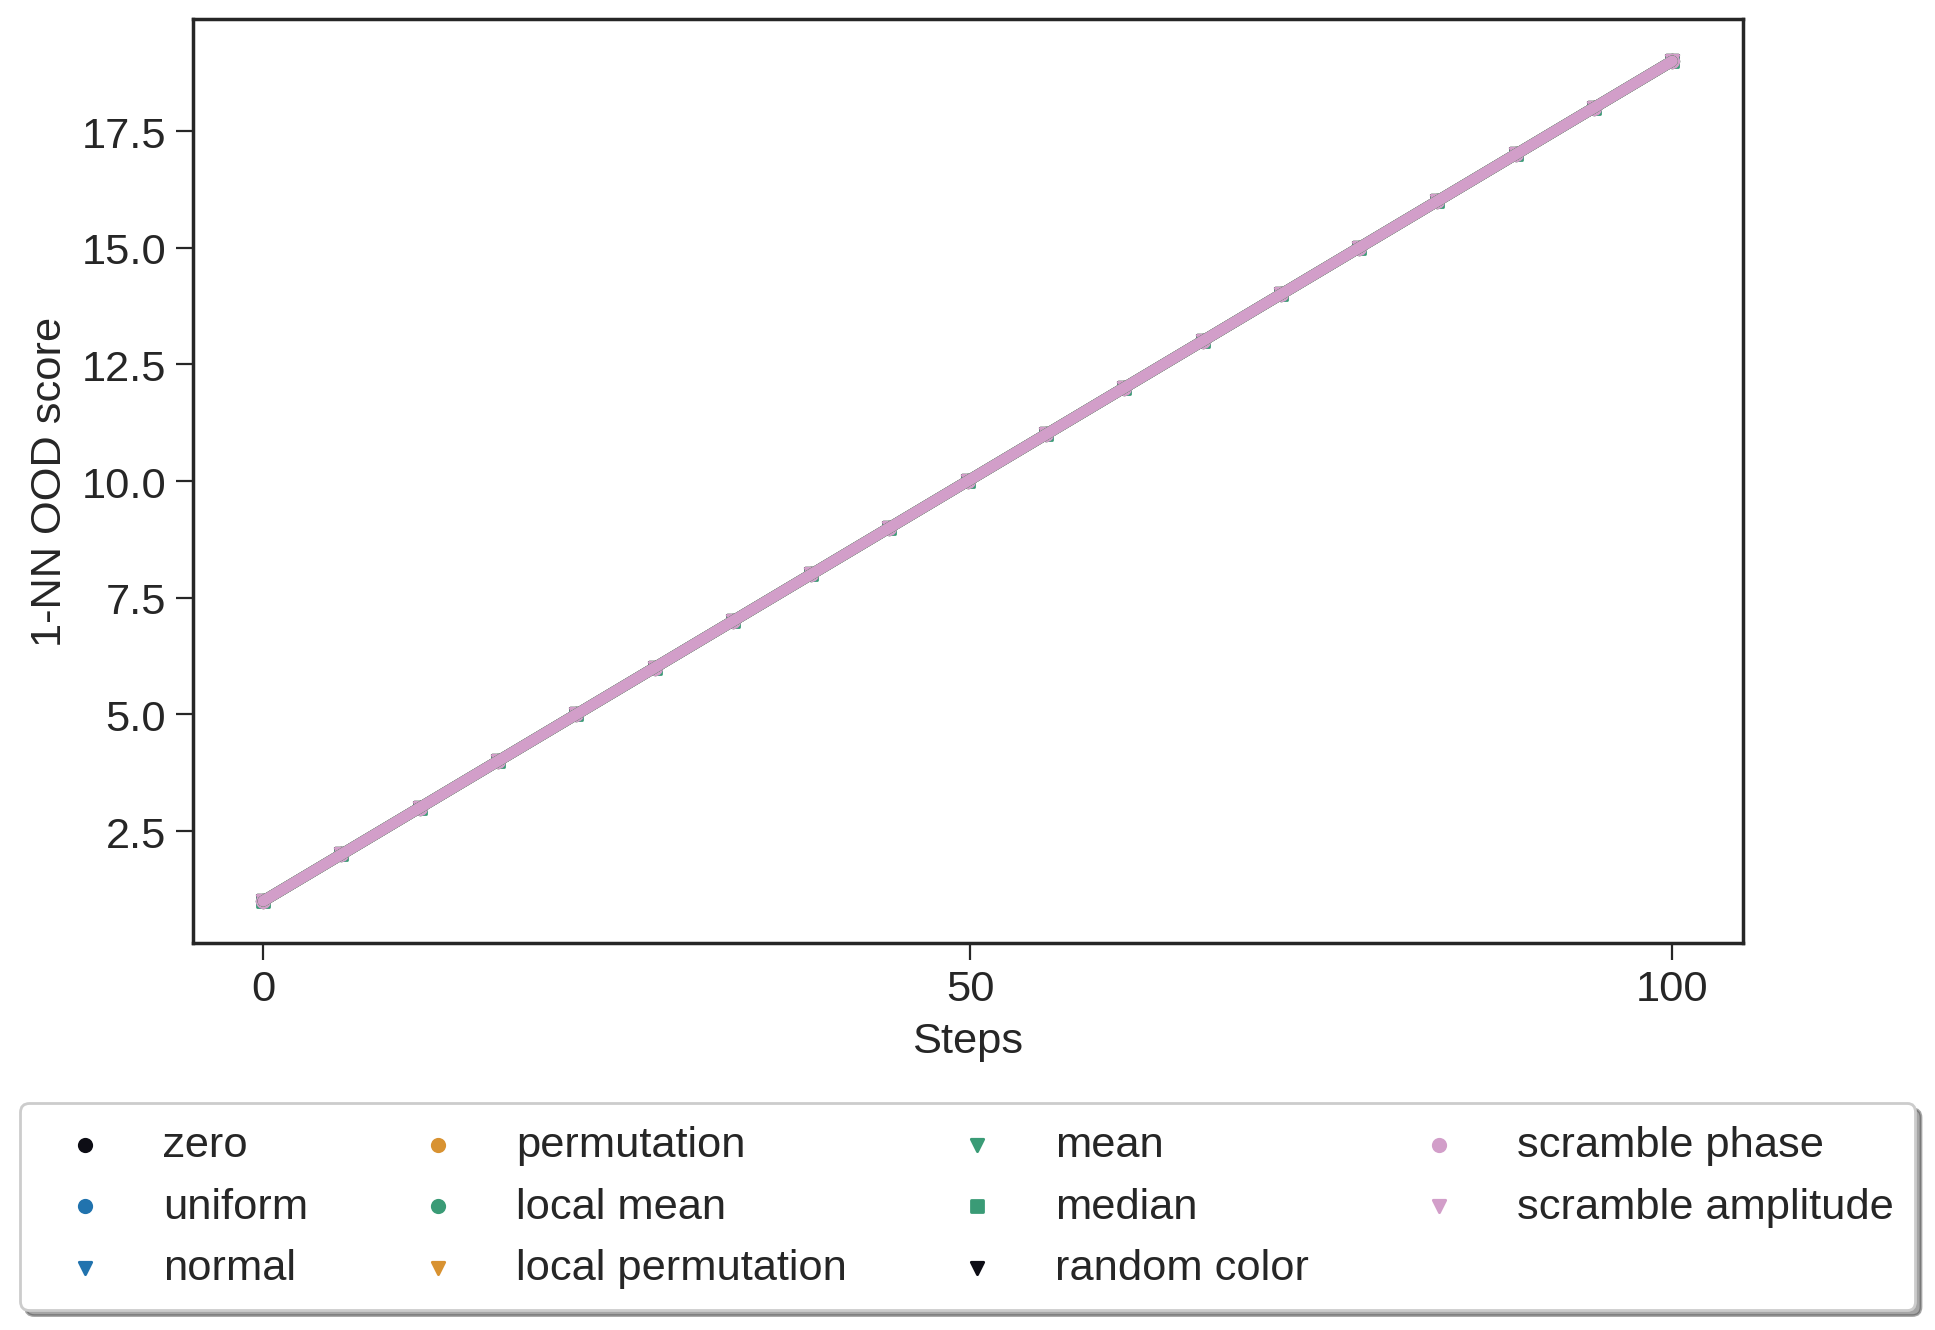

In [ ]:
import scipy
import matplotlib as mpl
from scipy import interpolate

mpl.rcdefaults()
fontsize(1.3)
set_size(10, 6)
plt.style.use("seaborn-ticks")

lw1 = 1.0
lw2 = 4.0
alpha_minor = 0.2

meta_curves = {}
meta_curves_color = {}

for baseline in results:
  points = results[baseline]

  curve = [np.mean(p) for p in points][1:]
  stds = [np.std(p) for p in points][1:]

  color = baseline_to_color[baseline]
  k = color(1.0)[0]
  if k not in meta_curves:
    meta_curves[k] = []
    meta_curves_color[k] = color

  meta_curves[k].append(curve)

  ls = baseline_to_linestyle[baseline]

  #plt.plot(curve, label=baseline.replace('_', ' '), linewidth=lw, c=color(1.0), alpha=0.8, linestyle=ls)
  plt.scatter(np.arange(len(curve)), curve, c=color(1.0), marker=baseline_to_symbol[baseline],
              label=baseline.replace('_', ' '), alpha=1.0, s=20.0)
  plt.plot(np.arange(len(curve)), curve, linewidth=lw1, c=color(1.0), alpha=alpha_minor, linestyle="--")

for k in meta_curves:
  color = meta_curves_color[k]
  y_mean = np.mean(meta_curves[k], 0)
  plt.plot(np.arange(len(curve)), y_mean, linewidth=lw2, c=color(1.0), alpha=1.0, linestyle="-")


legend = plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15),
                      fancybox=True, shadow=True, borderpad=0.5, ncol=4, frameon=True,
                      facecolor='white')
plt.xticks([0, xs[len(xs)//2], xs[-1]], [0, 50, 100])
plt.xlabel("Steps")
plt.ylabel('1-NN OOD score')
plt.savefig('ood_resnet_deletion.png', dpi=400, transparent=True)
#plt.title()

In [ ]:
list(color(1.0))

[0.050980392156862744, 0.050980392156862744, 0.08235294117647059, 1.0]

In [ ]:
sns.set(font_scale=0.7)
set_size(5, 3)

for i in range(30):

  #c1, c2, c3, c4 = np.random.choice([slack_blue, slack_green, slack_red, slack_yellow, slack_violet, google_blue, google_red, google_yellow, google_green, deep_purple, pink, brown], 4, replace=False)
  c3, c4 = np.random.choice([slack_blue, slack_green, slack_red, google_blue, google_red, google_green, deep_purple, pink, brown], 2, replace=False)
  c1 = slack_violet
  c2 = google_yellow

  baseline_to_color = {
  'zero' : anthracite,
  'uniform' : c1,
  'normal' : c1,
  'permutation' : c2,
  'local_permutation' : c2,
  'local_mean' : c3,
  'mean' : c3,
  'median' : c3,
  'random_color' : anthracite,
  'scramble_phase' : c4,
  'scramble_amplitude' : c4,
  }


  for baseline in results:
    points = results[baseline]

    curve = [np.mean(p) for p in points][1:]
    stds = [np.std(p) for p in points][1:]

    color = baseline_to_color[baseline]
    ls = baseline_to_linestyle[baseline]

    xs, ys = poly_interp(curve)

    #plt.plot(curve, label=baseline.replace('_', ' '), linewidth=lw, c=color(1.0), alpha=0.8, linestyle=ls)
    plt.plot(xs, ys, label=baseline.replace('_', ' '), linewidth=lw, c=color(1.0), alpha=0.8, linestyle=ls)

  legend = plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.25),
                        fancybox=True, shadow=True, borderpad=0.5, ncol=4, frameon=True,
                        facecolor='white')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
set_size(15, 8)

for baseline_name, baseline_func in baselines.items():
  scores = [np.mean(d) for _, d in RESULTS[baseline_name]]
  plt.plot(scores, label=baseline_name)

plt.tight_layout()
plt.legend()

In [ ]:
import os

results = {}

for p in os.listdir("/content/results_resnet"):
  if "ood_" not in p:
    data = np.load('/content/results_resnet/'+p, allow_pickle=True)[()]
    data = [(m, d, i, u) for m, d, i, u in data if 'Guided' not in m]
    deletions = [(m.replace('resnet50_', '').replace('.npy', ''), d) for m, d, i, _ in data]
    insertions = [(m.replace('resnet50_', '').replace('.npy', ''), i) for m, d, i, _ in data]
    methods = [m.replace('resnet50_', '').replace('.npy', '') for m, d, i, _ in data]
    results[p.replace('.npy', '')] = (deletions, insertions)

baselines = list(results.keys())

In [ ]:
method_to_id = {m : i for m, i in enumerate(methods)}
method_to_id, baselines

({0: 'GuidedBackprop',
  1: 'Occlusion',
  2: 'SobolAttributionMethod',
  3: 'Saliency',
  4: 'IntegratedGradients',
  5: 'VarGrad',
  6: 'SmoothGrad',
  7: 'SquareGrad',
  8: 'GradCAMPP',
  9: 'DeconvNet',
  10: 'GradCAM',
  11: 'GradientInput',
  12: 'Rise',
  13: 'HsicAttributionMethod'},
 ['local_permutation',
  'random_color',
  'local_mean',
  'normal',
  'scramble_amplitude',
  'uniform',
  'scramble_phase',
  'median',
  'zero',
  'mean',
  'permutation'])

In [ ]:
method_to_id = {m : i for m, i in enumerate(methods)}
method_to_id = {m : i for m, i in enumerate(methods)}

ranks_del = {m: {} for m in methods}
ranks_ins = {m: {} for m in methods}

for baseline in results.keys():
  deletions, insertions = results[baseline]

  order_del = np.argsort([float(d) for m, d in deletions])
  order_ins = np.argsort([float(i) for m, i in insertions])[::-1]

  for rank_i, i in enumerate(order_del):
    ranks_del[deletions[i][0]][baseline] = rank_i

  for rank_i, i in enumerate(order_ins):
    ranks_ins[insertions[i][0]][baseline] = rank_i

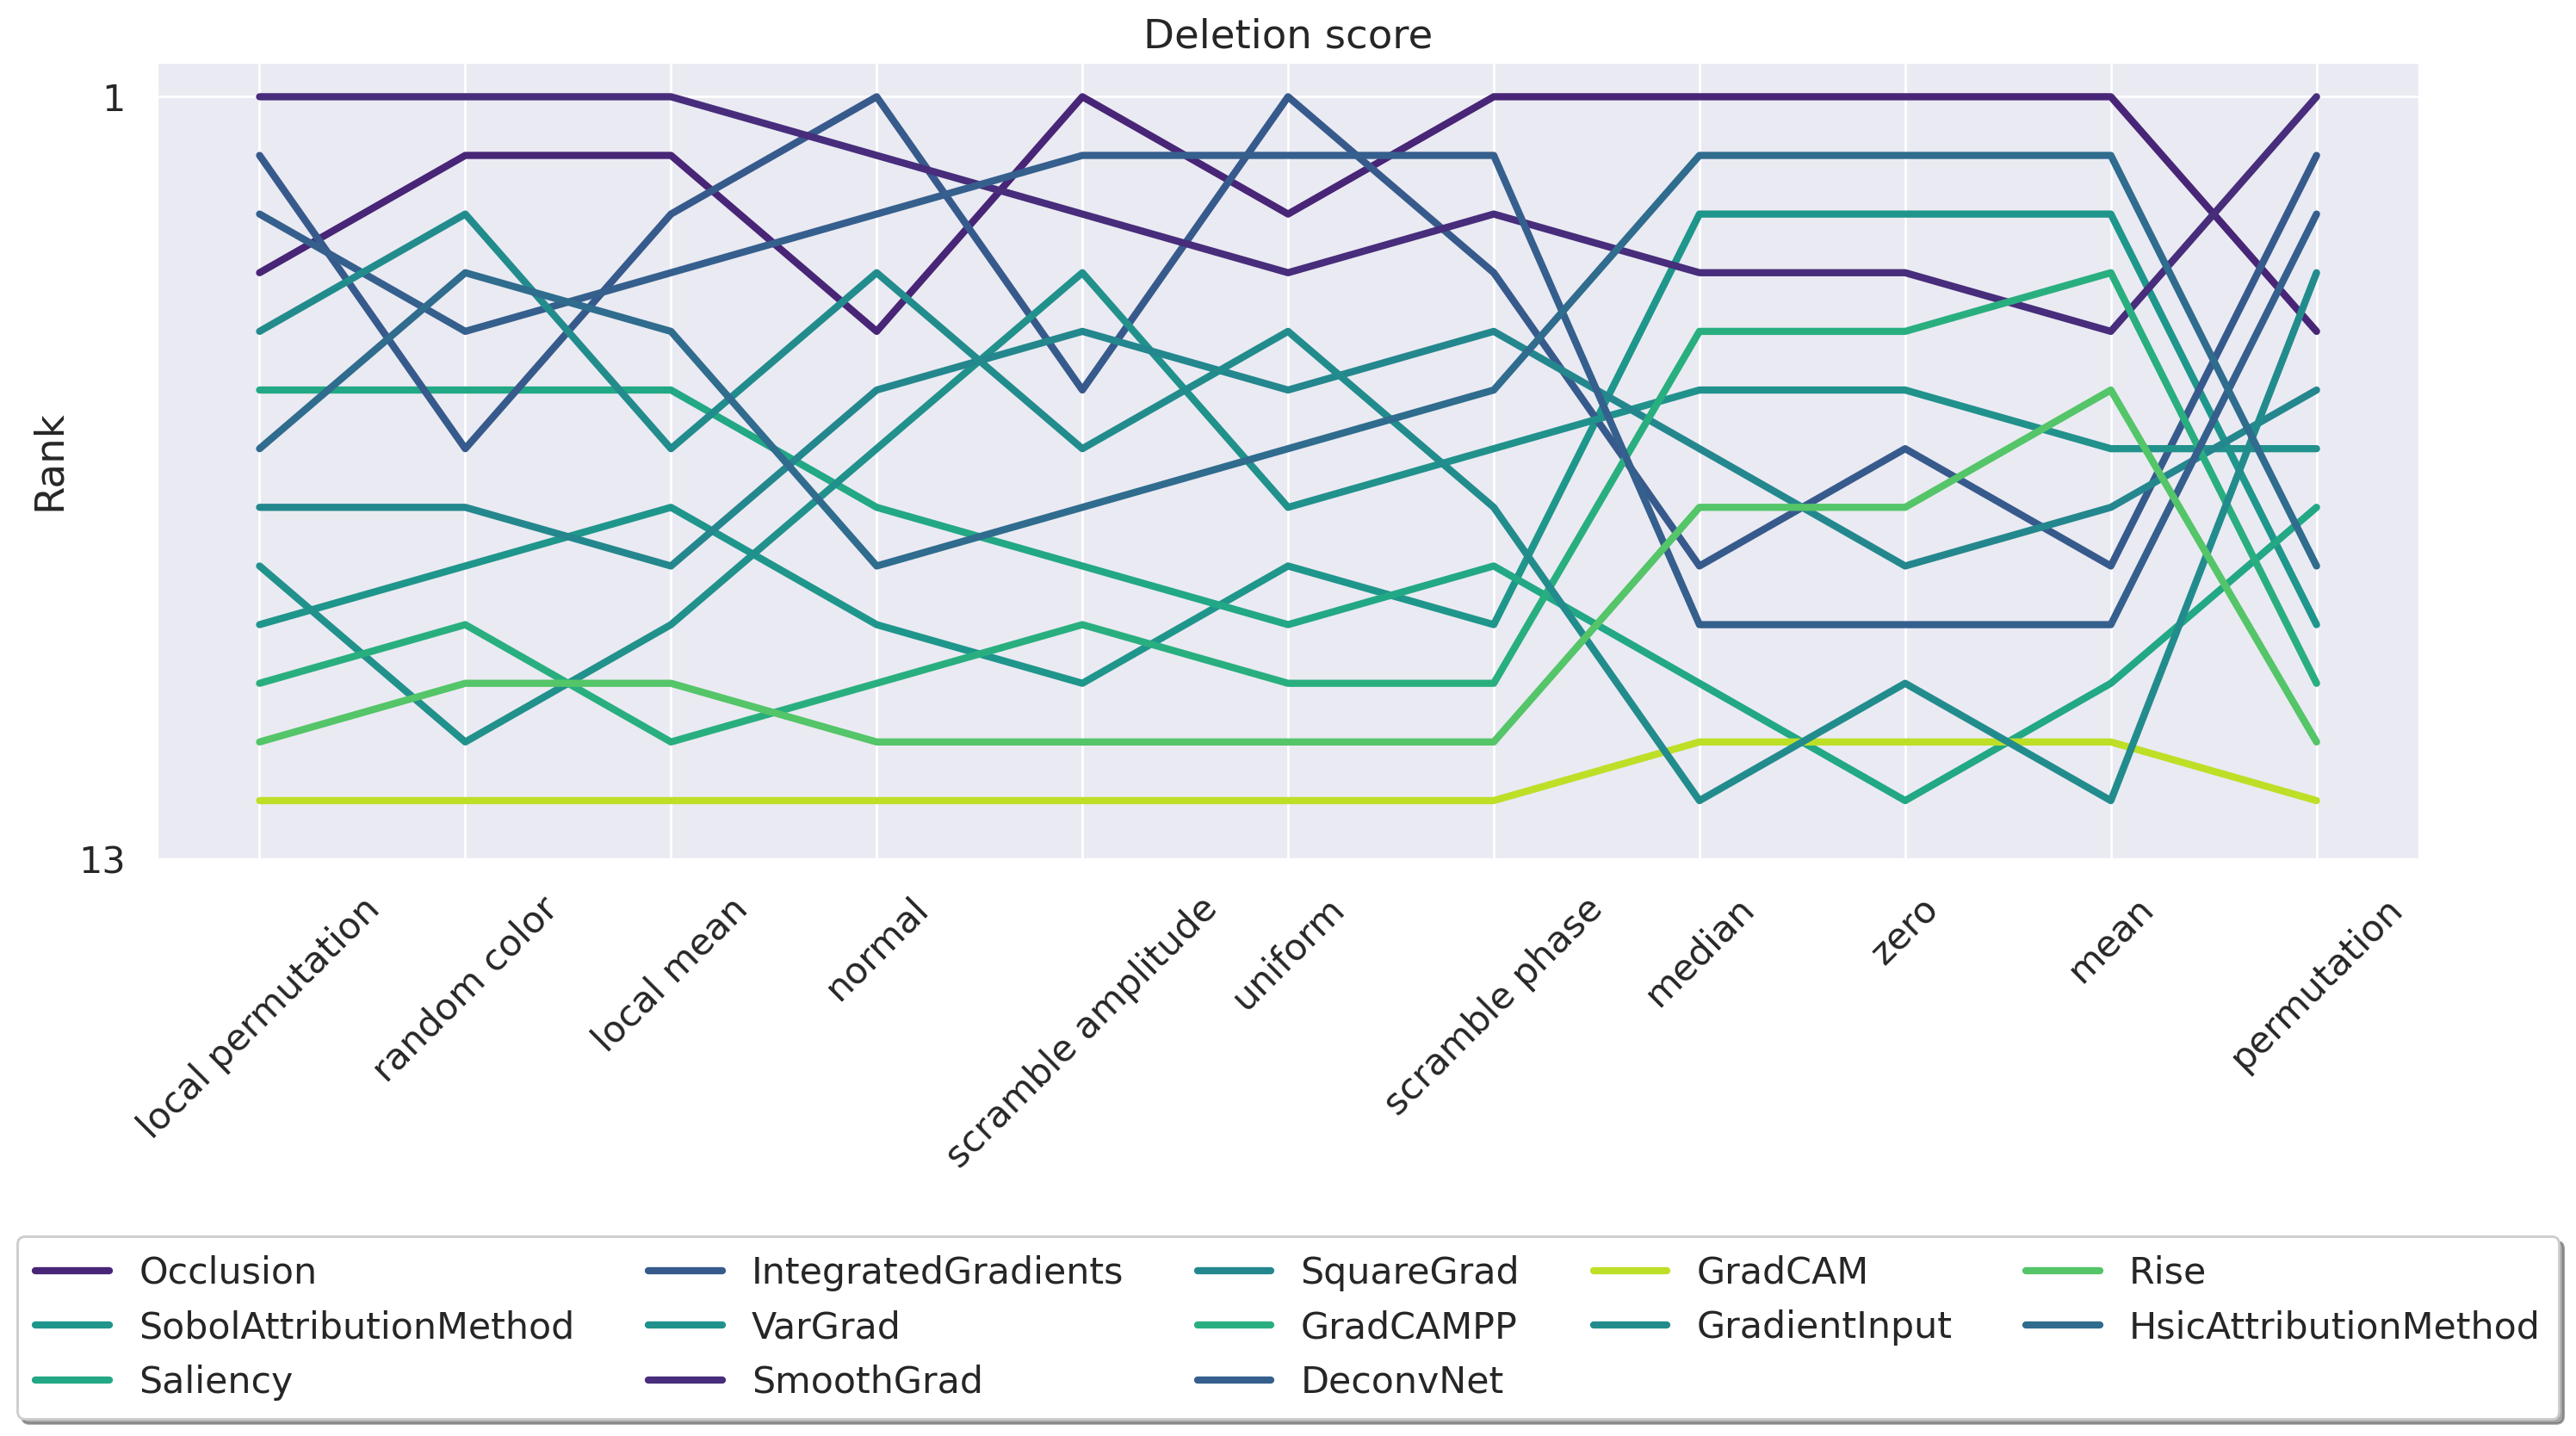

In [ ]:
sns.set(font_scale=1.4)
set_size(16, 10)
cmap = plt.get_cmap('viridis')

lw = 3.0

for m in methods:
  order = [len(methods) - ranks_del[m][b] for b in baselines]
  color = cmap((len(methods) - np.mean(order)) / len(methods))
  plt.plot(order, label=m, c=color, linewidth=lw)

legend   = plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.45),
                      fancybox=True, shadow=True, borderpad=0.5, ncol=5, frameon=True,
                      facecolor='white') # = ivan

plt.xticks(range(len(baselines)), [b.replace('_', ' ') for b in baselines], rotation=45)
#plt.yticks(range(1, len(methods)+1), [len(methods) - i for i in range(len(methods))])
plt.yticks([0, len(methods)], [len(methods), 1])
plt.ylabel('Rank')
#plt.xlabel('Baselines')
plt.title("Deletion score")
plt.tight_layout()
plt.savefig('deletion_ranking.png', dpi=400, transparent=True)
plt.show()

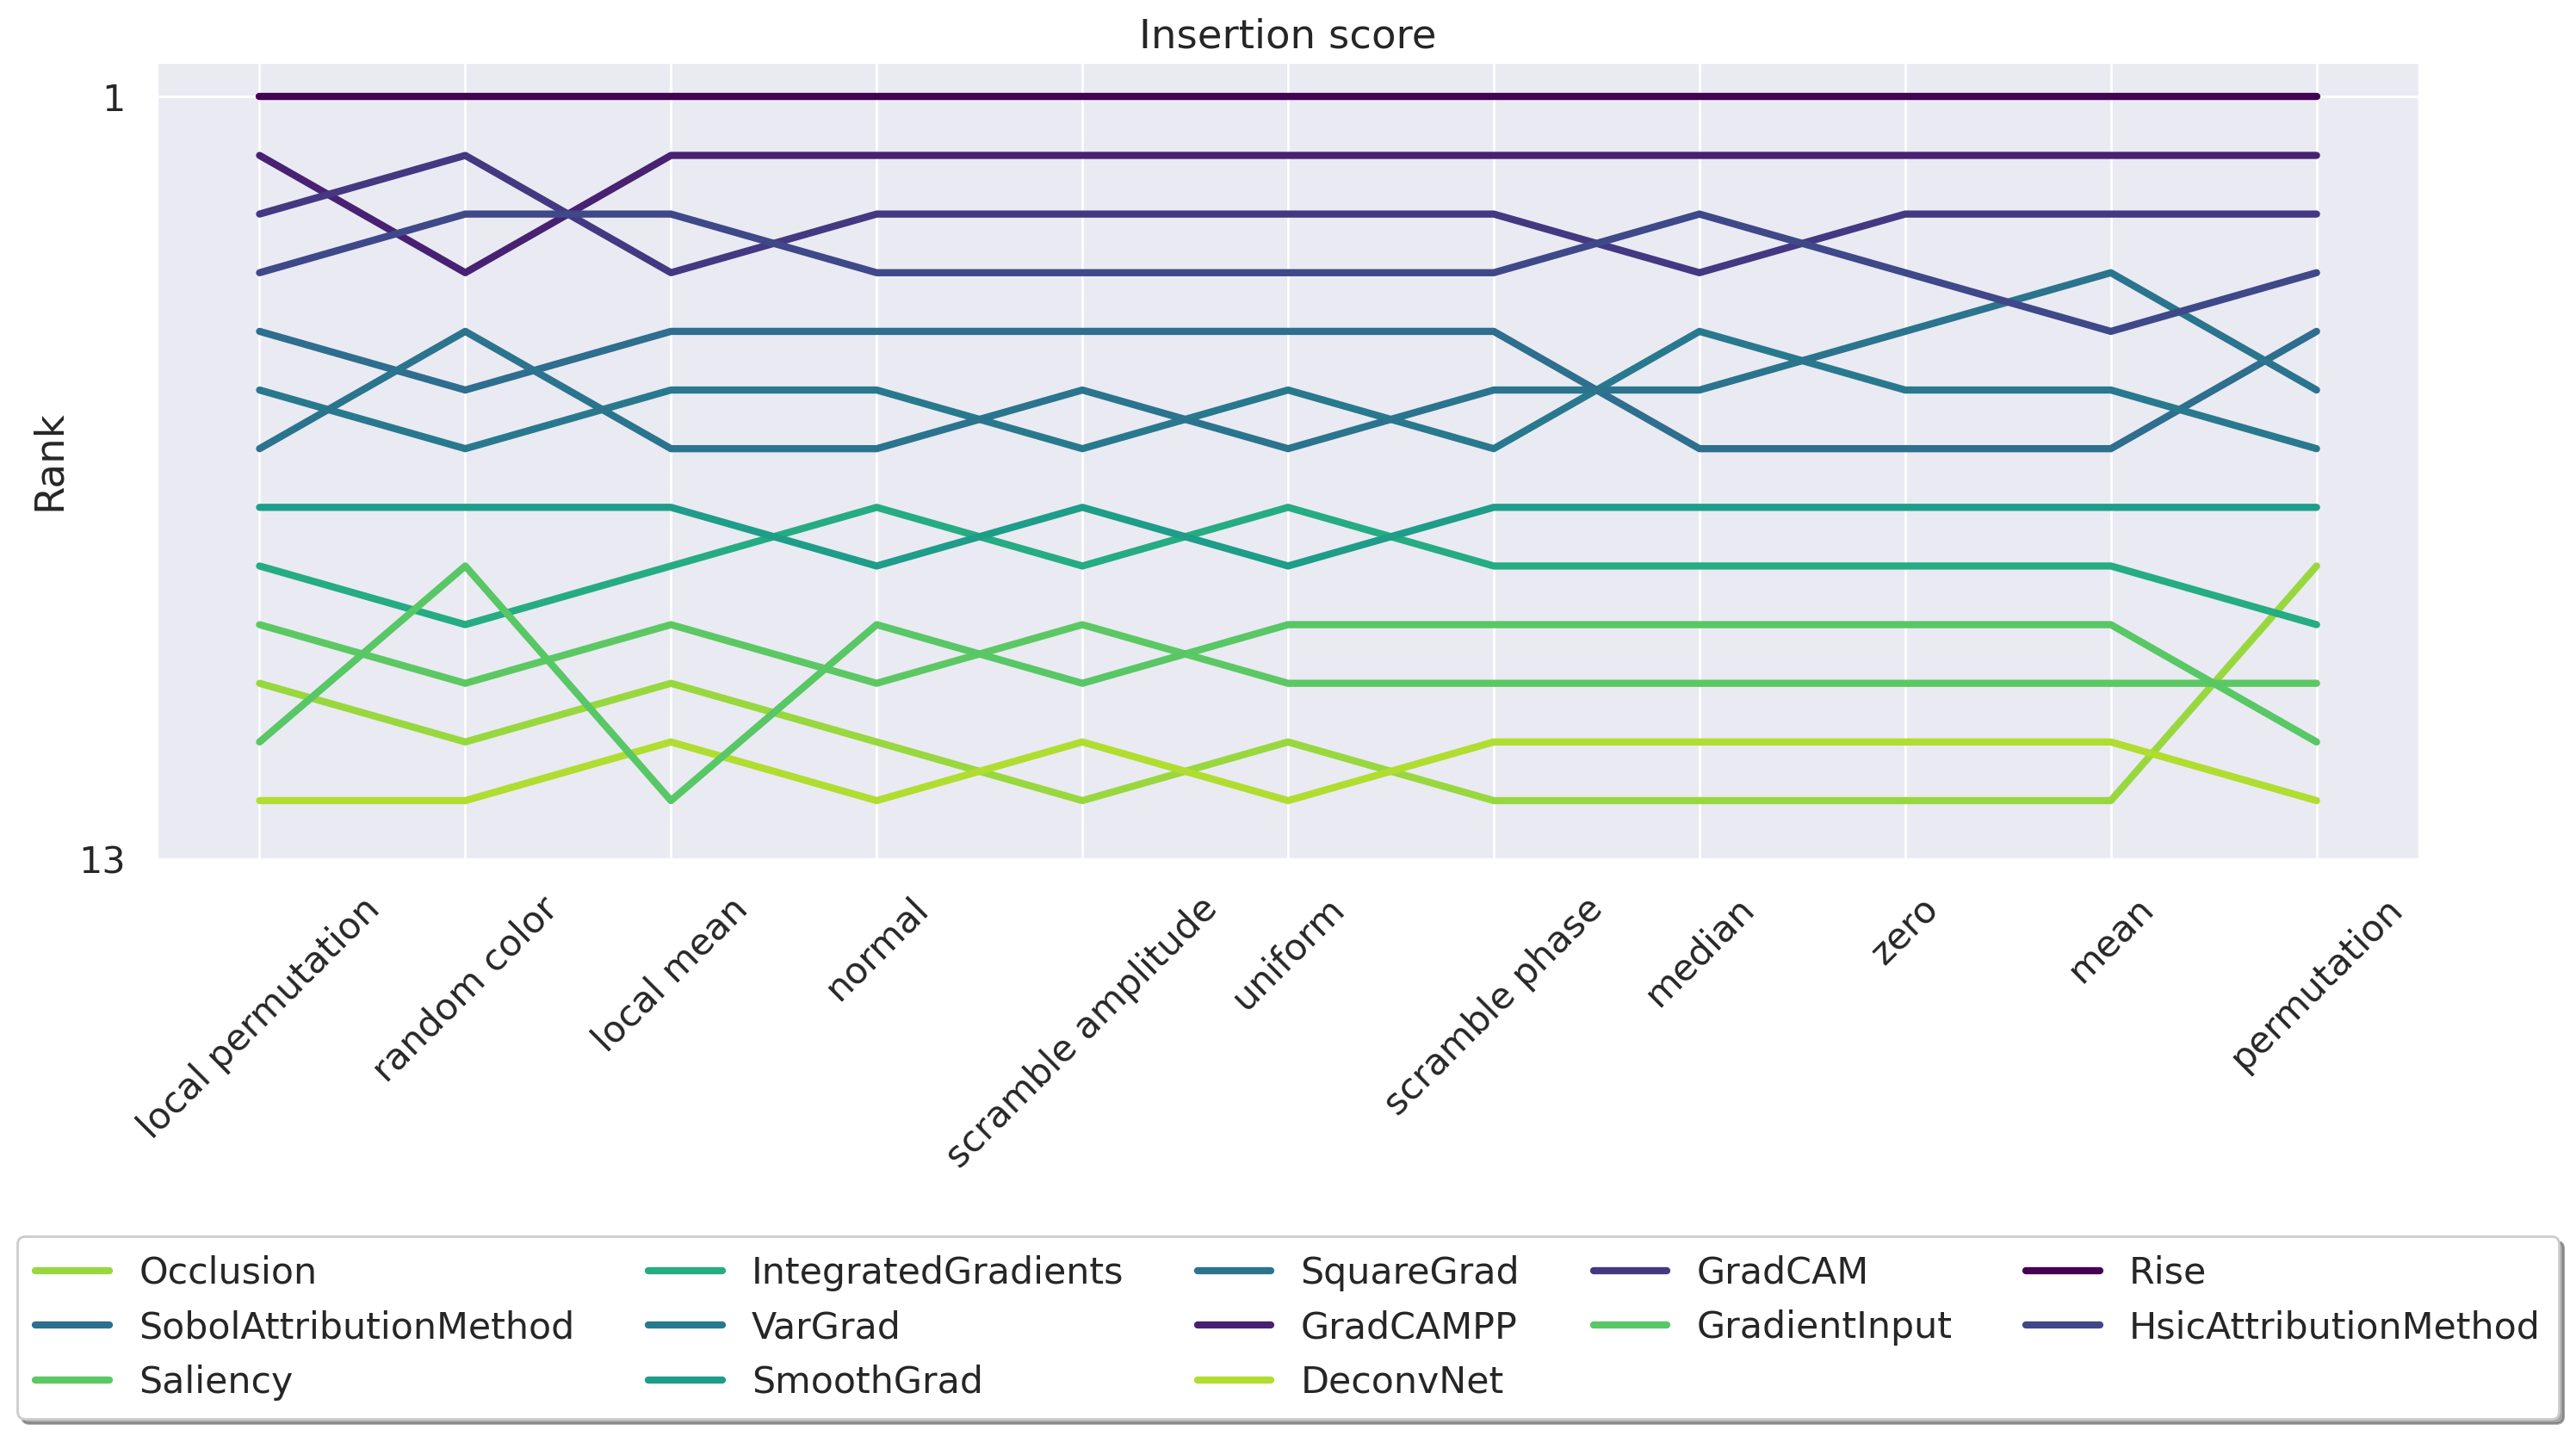

In [ ]:
sns.set(font_scale=1.4)
set_size(16, 10)
cmap = plt.get_cmap('viridis')

lw = 3.0

for m in methods:
  order = [len(methods) - ranks_ins[m][b] for b in baselines]
  color = cmap((len(methods) - np.mean(order)) / len(methods))
  plt.plot(order, label=m, c=color, linewidth=lw)

legend   = plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.45),
                      fancybox=True, shadow=True, borderpad=0.5, ncol=5, frameon=True,
                      facecolor='white') # = ivan

plt.xticks(range(len(baselines)), [b.replace('_', ' ') for b in baselines], rotation=45)
#plt.yticks(range(1, len(methods)+1), [len(methods) - i for i in range(len(methods))])
plt.yticks([0, len(methods)], [len(methods), 1])
plt.ylabel('Rank')
#plt.xlabel('Baselines')
plt.title("Insertion score")
plt.tight_layout()
plt.savefig('insertion_ranking.png', dpi=400, transparent=True)
plt.show()

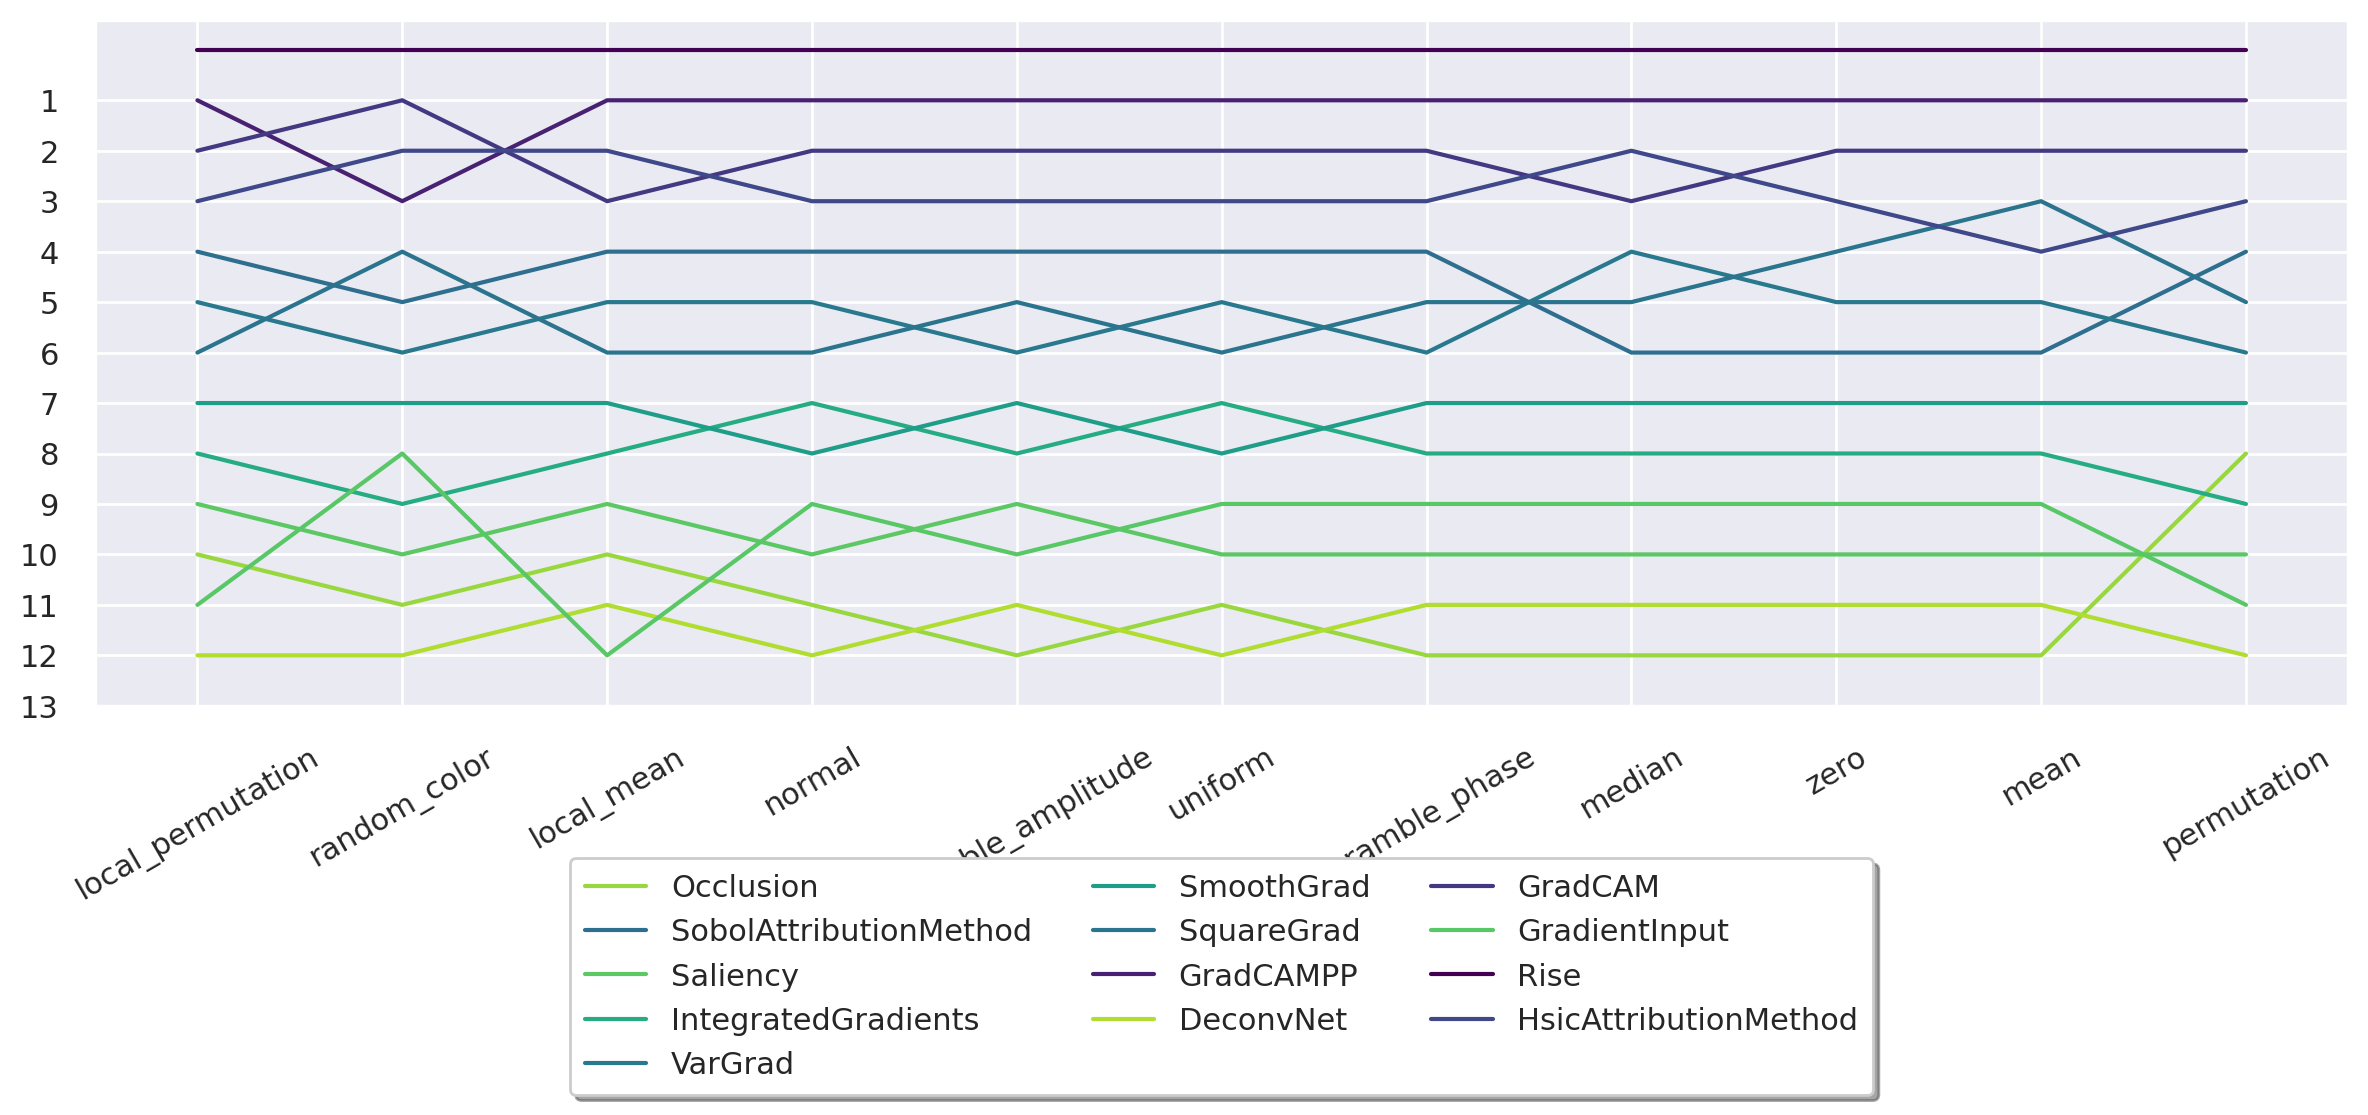

In [ ]:
sns.set(font_scale=1)
set_size(12, 6)
cmap = plt.get_cmap('viridis')


for m in methods:
  order = [len(methods) - ranks_ins[m][b] for b in baselines]
  color = cmap((len(methods) - np.mean(order)) / len(methods))
  plt.plot(order, label=m, c=color)

legend   = plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2),
                      fancybox=True, shadow=True, borderpad=0.5, ncol=3, frameon=True,
                      facecolor='white') # = ivan

plt.tight_layout()
plt.xticks(range(len(baselines)), baselines, rotation=30)
plt.yticks(range(len(methods)), [len(methods) - i for i in range(len(methods))])
plt.show()